In [2]:
"""
Import necessary packages
"""

# import os and set devices to only cpu
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# all other imports
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
from log_reg_utilities import *


"""
Complete checks to ensure status of TensorFlow
"""

# ensure eager execution
print("Eager execution:", tf.executing_eagerly())

# check if GPU is available on system
device_name = tf.config.list_physical_devices("GPU")

if(device_name):
    print(f"GPU Available: {device_name}")
else:
    print("CPU Only")

2025-10-05 18:29:43.338866: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759714183.359833  642666 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759714183.366805  642666 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Eager execution: True
CPU Only


2025-10-05 18:29:46.937151: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-10-05 18:29:46.937196: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: AGSTUF
2025-10-05 18:29:46.937206: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: AGSTUF
2025-10-05 18:29:46.937413: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 580.82.9
2025-10-05 18:29:46.937457: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:172] kernel reported version is: 580.82.9
2025-10-05 18:29:46.937468: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:259] kernel version seems to match DSO: 580.82.9


Train Set:        (54000, 784), (54000,)
Validation Set:   (6000, 784) , (6000,)
Test Set :        (10000, 784), (10000,)
Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7587 - loss: 0.7307 - val_accuracy: 0.8103 - val_loss: 0.5620
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8290 - loss: 0.5112 - val_accuracy: 0.8290 - val_loss: 0.5034
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8406 - loss: 0.4702 - val_accuracy: 0.8388 - val_loss: 0.4787
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8476 - loss: 0.4480 - val_accuracy: 0.8465 - val_loss: 0.4579
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8515 - loss: 0.4355 - val_accuracy: 0.8470 - val_loss: 0.4475
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8547 - loss: 0.4254 - val_accuracy: 0.8533 - val_loss: 0.4384
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8571 - loss: 0.4181 - val_accuracy: 0.8535 -

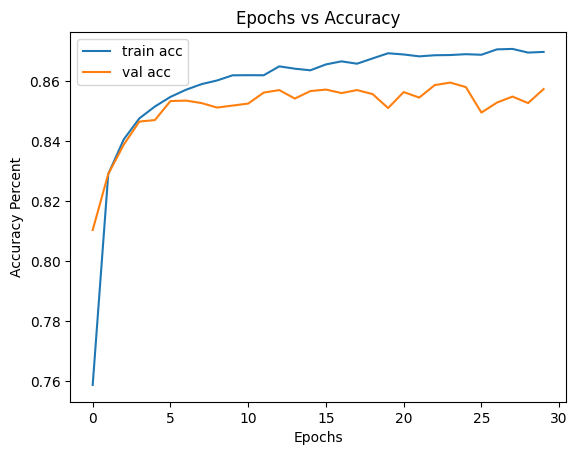

Train Set:        (54000, 784), (54000,)
Validation Set:   (6000, 784) , (6000,)
Test Set :        (10000, 784), (10000,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


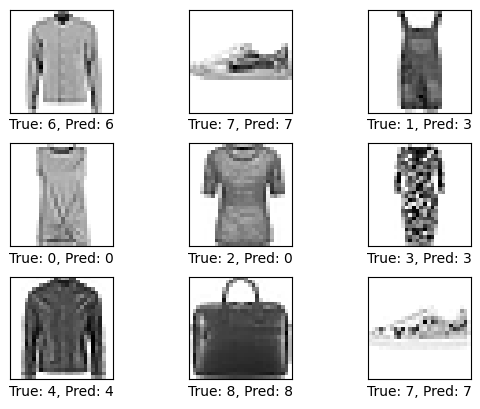

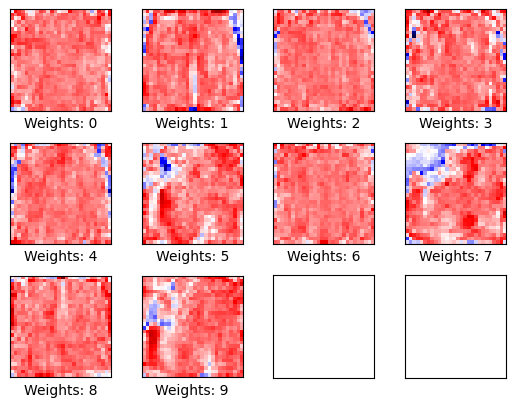

In [23]:
# TEMPLATE

model, history_res = run_model(learning_rate = 0.001,
                               input_batch_size = 100,
                               n_epochs = 30,
                               val_fract = .10,
                               optimizer_type = ADAM)

plt.plot(history_res.history["accuracy"], label="train acc")
plt.plot(history_res.history["val_accuracy"], label="val acc")
plt.legend()
plt.title("Epochs vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Percent")
plt.show()

# get test data (MAKE SURE 0.1 MATCHES VAL_FRACT)
X_val, y_val, X_train, y_train, X_test, y_test = get_data(0.1)

# select 9 samples
idx = np.random.choice(len(X_test), 9, replace=False)
sample_images = X_test[idx]
true_labels = y_test[idx]

# predict
pred_probs = model.predict(sample_images)
yhat = np.argmax(pred_probs, axis=1)

# plot both the images and the weights
plot_images(sample_images, true_labels, yhat)
plot_weights(model)

In [9]:
# Run each optimizer

optimizers = [SGD, ADAM, ADAGRAD, NADAM, RMSPROP]
results = {}

for opt in optimizers:
    print(f"Running optimizer: {opt}")
    model, history = run_model(
        learning_rate=0.001,
        input_batch_size=100,
        n_epochs=30,
        val_fract=0.1,
        optimizer_type=opt
    )

    results[opt] = model, history



Running optimizer: SGD
Train Set:        (54000, 784), (54000,)
Validation Set:   (6000, 784) , (6000,)
Test Set :        (10000, 784), (10000,)
Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3866 - loss: 1.8969 - val_accuracy: 0.5588 - val_loss: 1.5895
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6137 - loss: 1.4245 - val_accuracy: 0.6498 - val_loss: 1.2967
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6601 - loss: 1.2131 - val_accuracy: 0.6797 - val_loss: 1.1408
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6824 - loss: 1.0921 - val_accuracy: 0.6952 - val_loss: 1.0450
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6954 - loss: 1.0132 - val_accuracy: 0.7072 - val_loss: 0.9791
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7072 - loss: 0.9572 - val_accuracy: 0.7178 - val_loss: 0.9303
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7168 - loss: 0.9148 -

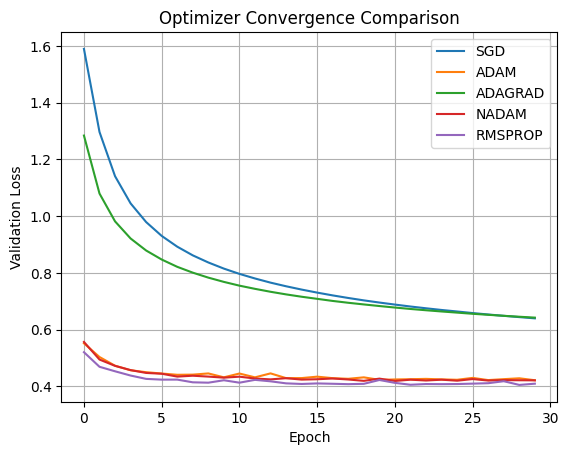


Optimizer: SGD
  Final Train Loss: 0.6489655375480652
  Final Val Loss:   0.6397136449813843
  Best Val Loss:    0.6397136449813843 (Epoch 30)
  Final Train Acc:  0.7929629683494568
  Final Val Acc:    0.7960000038146973

Optimizer: ADAM
  Final Train Loss: 0.3686371445655823
  Final Val Loss:   0.4215298593044281
  Best Val Loss:    0.4215298593044281 (Epoch 30)
  Final Train Acc:  0.870888888835907
  Final Val Acc:    0.8558333516120911

Optimizer: ADAGRAD
  Final Train Loss: 0.6456865668296814
  Final Val Loss:   0.6422616243362427
  Best Val Loss:    0.6422616243362427 (Epoch 30)
  Final Train Acc:  0.790759265422821
  Final Val Acc:    0.7941666841506958

Optimizer: NADAM
  Final Train Loss: 0.3689534366130829
  Final Val Loss:   0.4210732877254486
  Best Val Loss:    0.4189462959766388 (Epoch 21)
  Final Train Acc:  0.8705925941467285
  Final Val Acc:    0.859000027179718

Optimizer: RMSPROP
  Final Train Loss: 0.3792928159236908
  Final Val Loss:   0.4094114601612091
  Best Val

In [ ]:
# display the convergence curves
for opt, hist in results.items():
    plt.plot(hist[1].history["val_loss"], label=f"{opt}")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Optimizer Convergence Comparison")
plt.legend()
plt.grid(True)
plt.show()

# print summary for each optimizer type
for opt, hist in results.items():
    h = hist[1].history
    print(f"\nOptimizer: {opt}")
    print(f"  Final Train Loss: {h["loss"][-1]}")
    print(f"  Final Val Loss:   {h["val_loss"][-1]}")
    print(f"  Best Val Loss:    {np.min(h["val_loss"])} (Epoch {np.argmin(h["val_loss"])+1})")
    print(f"  Final Train Acc:  {h["accuracy"][-1]}")
    print(f"  Final Val Acc:    {h["val_accuracy"][-1]}")

In [12]:
# Run different epochs
epochs = [30, 50, 70, 100, 200]
results_epoch = {}

for epoch in epochs:
    print(f"Running epoch max: {epoch}")
    model, history = run_model(
        learning_rate=0.001,
        input_batch_size=100,
        n_epochs=epoch,
        val_fract=0.1,
        optimizer_type=ADAM
    )

    results_epoch[epoch] = model, history

Running epoch max: 30
Train Set:        (54000, 784), (54000,)
Validation Set:   (6000, 784) , (6000,)
Test Set :        (10000, 784), (10000,)
Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7599 - loss: 0.7296 - val_accuracy: 0.8220 - val_loss: 0.5345
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8284 - loss: 0.5132 - val_accuracy: 0.8420 - val_loss: 0.4707
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8417 - loss: 0.4715 - val_accuracy: 0.8500 - val_loss: 0.4439
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8479 - loss: 0.4508 - val_accuracy: 0.8478 - val_loss: 0.4409
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8512 - loss: 0.4365 - val_accuracy: 0.8552 - val_loss: 0.4263
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8530 - loss: 0.4277 - val_accuracy: 0.8547 - val_loss: 0.4181
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8572 - loss: 0.4196 - 

In [ ]:
# print summary for each optimizer type
for epoch, hist in results_epoch.items():
    h = hist[1].history
    print(f"\nEpoch: {epoch}")
    print(f"  Final Train Loss: {h["loss"][-1]}")
    print(f"  Final Val Loss:   {h["val_loss"][-1]}")
    print(f"  Best Val Loss:    {np.min(h["val_loss"])} (Epoch {np.argmin(h["val_loss"])+1})")
    print(f"  Final Train Acc:  {h["accuracy"][-1]}")
    print(f"  Final Val Acc:    {h["val_accuracy"][-1]}")


Epoch: 30
  Final Train Loss: 0.3728425204753876
  Final Val Loss:   0.3933336138725281
  Best Val Loss:    0.3881116807460785 (Epoch 23)
  Final Train Acc:  0.8694074153900146
  Final Val Acc:    0.8628333210945129

Epoch: 50
  Final Train Loss: 0.35939350724220276
  Final Val Loss:   0.4066495895385742
  Best Val Loss:    0.39895299077033997 (Epoch 22)
  Final Train Acc:  0.8731296062469482
  Final Val Acc:    0.8553333282470703

Epoch: 70
  Final Train Loss: 0.35223719477653503
  Final Val Loss:   0.4296673536300659
  Best Val Loss:    0.4068697392940521 (Epoch 29)
  Final Train Acc:  0.8724629878997803
  Final Val Acc:    0.8581666946411133

Epoch: 100
  Final Train Loss: 0.34628328680992126
  Final Val Loss:   0.44236665964126587
  Best Val Loss:    0.41470858454704285 (Epoch 25)
  Final Train Acc:  0.8737221956253052
  Final Val Acc:    0.8508333563804626

Epoch: 200
  Final Train Loss: 0.33678534626960754
  Final Val Loss:   0.4340757727622986
  Best Val Loss:    0.408251434564

In [19]:
# Run different splits
splits = [0.05, 0.10, 0.25, 0.50, 0.75]
results_split = {}

for split in splits:
    print(f"Running with validation fraction = {split}")
    model, history = run_model(
        learning_rate=0.001,
        input_batch_size=100,
        n_epochs=30,   
        val_fract=split,  
        optimizer_type=ADAM
    )

    results_split[split] = model, history

Running with validation fraction = 0.05
Train Set:        (57000, 784), (57000,)
Validation Set:   (3000, 784) , (3000,)
Test Set :        (10000, 784), (10000,)
Epoch 1/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7642 - loss: 0.7091 - val_accuracy: 0.8177 - val_loss: 0.5455
Epoch 2/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8294 - loss: 0.5062 - val_accuracy: 0.8307 - val_loss: 0.4912
Epoch 3/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8419 - loss: 0.4666 - val_accuracy: 0.8377 - val_loss: 0.4729
Epoch 4/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8480 - loss: 0.4462 - val_accuracy: 0.8430 - val_loss: 0.4545
Epoch 5/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8520 - loss: 0.4338 - val_accuracy: 0.8427 - val_loss: 0.4496
Epoch 6/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8558 - loss: 0.4225 - val_accuracy: 0.8490 - val_loss: 0.4468
Epoch 7/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8573


Percent validation: 0.05
  Final Train Loss: 0.3701936602592468
  Final Val Loss:   0.4143867492675781
  Final Train Acc:  0.8705438375473022
  Final Val Acc:    0.8576666712760925

Percent validation: 0.1
  Final Train Loss: 0.3712664246559143
  Final Val Loss:   0.4156781733036041
  Final Train Acc:  0.869185209274292
  Final Val Acc:    0.8568333387374878

Percent validation: 0.25
  Final Train Loss: 0.37242552638053894
  Final Val Loss:   0.40163153409957886
  Final Train Acc:  0.8695555329322815
  Final Val Acc:    0.8644000291824341

Percent validation: 0.5
  Final Train Loss: 0.37141767144203186
  Final Val Loss:   0.419108510017395
  Final Train Acc:  0.8711000084877014
  Final Val Acc:    0.8554999828338623

Percent validation: 0.75
  Final Train Loss: 0.37380680441856384
  Final Val Loss:   0.44061172008514404
  Final Train Acc:  0.8719333410263062
  Final Val Acc:    0.8479999899864197


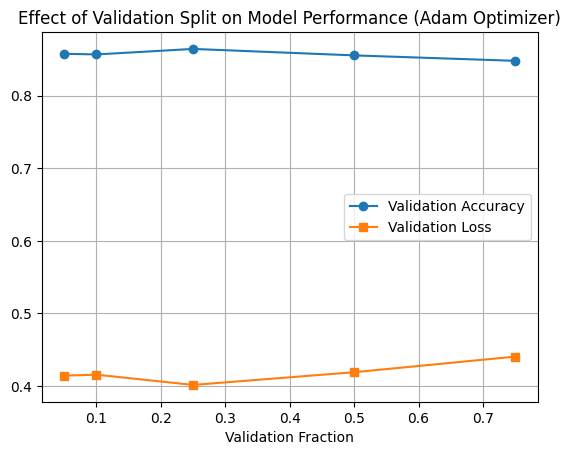

In [ ]:
# print summary for each split
for split, hist in results_split.items():
    h = hist[1].history
    print(f"\nPercent validation: {split}")
    print(f"  Final Train Loss: {h["loss"][-1]}")
    print(f"  Final Val Loss:   {h["val_loss"][-1]}")
    print(f"  Final Train Acc:  {h["accuracy"][-1]}")
    print(f"  Final Val Acc:    {h["val_accuracy"][-1]}")

splits = [0.05, 0.10, 0.25, 0.50, 0.75]
val_accs = [0.8577, 0.8568, 0.8644, 0.8555, 0.8480]
val_losses = [0.4144, 0.4157, 0.4016, 0.4191, 0.4406]

plt.plot(splits, val_accs, marker="o", label="Validation Accuracy")
plt.plot(splits, val_losses, marker="s", label="Validation Loss")
plt.xlabel("Validation Fraction")
plt.title("Effect of Validation Split on Model Performance (Adam Optimizer)")
plt.legend()
plt.grid(True)
plt.show()


In [25]:
# run different batch sizes
batch_sizes = [20, 40, 60, 100, 200]
results_batch_size = {}

for size in batch_sizes:
    print(f"Running with batch size = {size}")
    model, history = run_model(
        learning_rate=0.001,
        input_batch_size=size,
        n_epochs=30,   
        val_fract=0.10,  
        optimizer_type=ADAM
    )

    results_batch_size[size] = model, history

Running with batch size = 20
Train Set:        (54000, 784), (54000,)
Validation Set:   (6000, 784) , (6000,)
Test Set :        (10000, 784), (10000,)
Epoch 1/30
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8014 - loss: 0.5849 - val_accuracy: 0.8433 - val_loss: 0.4734
Epoch 2/30
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8421 - loss: 0.4571 - val_accuracy: 0.8390 - val_loss: 0.4675
Epoch 3/30
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8494 - loss: 0.4332 - val_accuracy: 0.8577 - val_loss: 0.4300
Epoch 4/30
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8540 - loss: 0.4203 - val_accuracy: 0.8520 - val_loss: 0.4476
Epoch 5/30
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8568 - loss: 0.4120 - val_accuracy: 0.8485 - val_loss: 0.4349
Epoch 6/30
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8585 - loss: 0.4053 - val_accuracy: 0.8545 - val_loss: 0.4308
Epoch 7/30
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8

In [ ]:
# print summary for each batch size
for size, hist in results_batch_size.items():
    h = hist[1].history
    print(f"\nBatch Size: {size}")
    print(f"  Final Train Loss: {h["loss"][-1]}")
    print(f"  Final Val Loss:   {h["val_loss"][-1]}")
    print(f"  Final Train Acc:  {h["accuracy"][-1]}")
    print(f"  Final Val Acc:    {h["val_accuracy"][-1]}")


Batch Size: 20
  Final Train Loss: 0.3670519292354584
  Final Val Loss:   0.4267064332962036
  Final Train Acc:  0.8703148365020752
  Final Val Acc:    0.8554999828338623

Batch Size: 40
  Final Train Loss: 0.3653497099876404
  Final Val Loss:   0.4419240653514862
  Final Train Acc:  0.8715741038322449
  Final Val Acc:    0.8533333539962769

Batch Size: 60
  Final Train Loss: 0.36629900336265564
  Final Val Loss:   0.4354860484600067
  Final Train Acc:  0.8708333373069763
  Final Val Acc:    0.8531666398048401

Batch Size: 100
  Final Train Loss: 0.3713156580924988
  Final Val Loss:   0.42400065064430237
  Final Train Acc:  0.8707963228225708
  Final Val Acc:    0.8463333249092102

Batch Size: 200
  Final Train Loss: 0.3787718713283539
  Final Val Loss:   0.41150596737861633
  Final Train Acc:  0.8676666617393494
  Final Val Acc:    0.8648333549499512


Train Set:        (54000, 784), (54000,)
Validation Set:   (6000, 784) , (6000,)
Test Set :        (10000, 784), (10000,)
Epoch 1/35
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7289 - loss: 0.8326 - val_accuracy: 0.8098 - val_loss: 0.5983
Epoch 2/35
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8148 - loss: 0.5573 - val_accuracy: 0.8293 - val_loss: 0.5197
Epoch 3/35
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8307 - loss: 0.5057 - val_accuracy: 0.8402 - val_loss: 0.4877
Epoch 4/35
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8384 - loss: 0.4793 - val_accuracy: 0.8447 - val_loss: 0.4690
Epoch 5/35
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8443 - loss: 0.4612 - val_accuracy: 0.8525 - val_loss: 0.4496
Epoch 6/35
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8469 - loss: 0.4497 - val_accuracy: 0.8513 - val_loss: 0.4406
Epoch 7/35
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8501 - loss: 0.4401 - val_accuracy: 0.8563 -

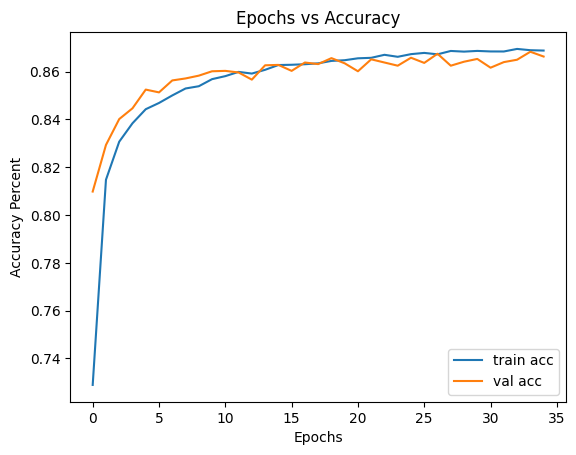

0.8688333630561829
0.8663333058357239
Train Set:        (54000, 784), (54000,)
Validation Set:   (6000, 784) , (6000,)
Test Set :        (10000, 784), (10000,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


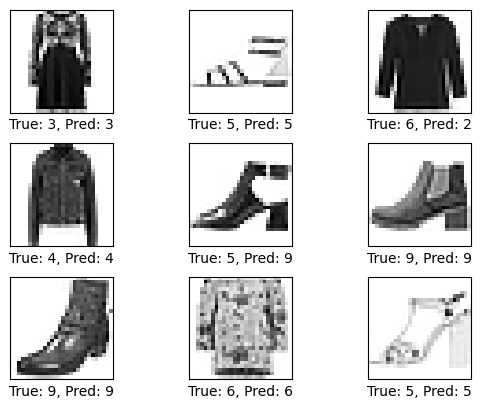

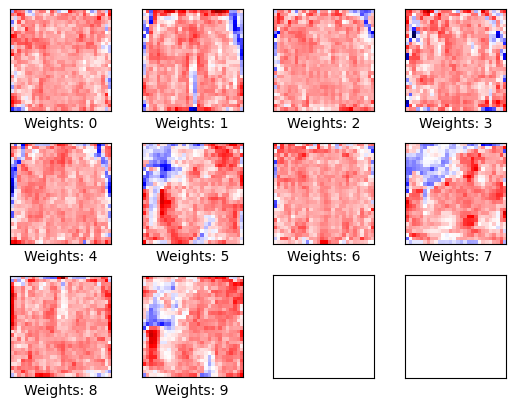

In [29]:
# model overfit analysis

model, history_res = run_model(learning_rate = 0.001,
                               input_batch_size = 200,
                               n_epochs = 35,
                               val_fract = .10,
                               optimizer_type = ADAM)

plt.plot(history_res.history["accuracy"], label="train acc")
plt.plot(history_res.history["val_accuracy"], label="val acc")
plt.legend()
plt.title("Epochs vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Percent")
plt.show()

print(history_res.history["accuracy"][-1])
print(history_res.history["val_accuracy"][-1])

# get test data (MAKE SURE 0.1 MATCHES VAL_FRACT)
X_val, y_val, X_train, y_train, X_test, y_test = get_data(0.1)

# select 9 samples
idx = np.random.choice(len(X_test), 9, replace=False)
sample_images = X_test[idx]
true_labels = y_test[idx]

# predict
pred_probs = model.predict(sample_images)
yhat = np.argmax(pred_probs, axis=1)

# plot both the images and the weights
plot_images(sample_images, true_labels, yhat)
plot_weights(model)

In [3]:
# time per epoch for the cpu

model, history, total_time, time_per_epoch = run_model(learning_rate = 0.001,
                               input_batch_size = 100,
                               n_epochs = 30,
                               val_fract = .10,
                               optimizer_type = ADAM)

print(total_time)
print(time_per_epoch)

Train Set:        (54000, 784), (54000,)
Validation Set:   (6000, 784) , (6000,)
Test Set :        (10000, 784), (10000,)
Epoch 1/30


2025-10-05 18:29:52.373639: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7625 - loss: 0.7632 - val_accuracy: 0.8217 - val_loss: 0.5794
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8254 - loss: 0.5696 - val_accuracy: 0.8348 - val_loss: 0.5358
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8371 - loss: 0.5427 - val_accuracy: 0.8425 - val_loss: 0.5207
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8431 - loss: 0.5290 - val_accuracy: 0.8490 - val_loss: 0.5096
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8454 - loss: 0.5222 - val_accuracy: 0.8525 - val_loss: 0.5056
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8474 - loss: 0.5178 - val_accuracy: 0.8485 - val_loss: 0.5059
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8484 - loss: 0.5132 - val_accuracy: 0.8477 - val_loss: 0.5106
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8484 - loss: 0.5125 - val_accuracy: 0.8503 - val_

ValueError: not enough values to unpack (expected 4, got 2)

In [5]:
# run test against random forest and svm model

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# load and prepare data
X_val, y_val, X_train, y_train, X_test, y_test = get_data(0.1)

model, history = run_model(
        learning_rate=0.001,
        input_batch_size=100,
        n_epochs=30,   
        val_fract=0.10,  
        optimizer_type=ADAM
    )

# define random forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# train the random forest model
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# define the svm model
svm = SVC(kernel="rbf", gamma="scale", random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

# get test predictions
yhat_probs = model.predict(X_test)
yhat = yhat_probs.argmax(axis=1)
log_acc = accuracy_score(y_test, yhat)

print(f"Logistic Regression Accuracy: {log_acc}")
print(f"Random Forest Accuracy:       {rf_acc}")
print(f"SVM Accuracy:                 {svm_acc}")

Train Set:        (54000, 784), (54000,)
Validation Set:   (6000, 784) , (6000,)
Test Set :        (10000, 784), (10000,)
Train Set:        (54000, 784), (54000,)
Validation Set:   (6000, 784) , (6000,)
Test Set :        (10000, 784), (10000,)
Epoch 1/30


2025-10-05 18:31:23.004672: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7520 - loss: 0.7751 - val_accuracy: 0.8128 - val_loss: 0.6159
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8271 - loss: 0.5689 - val_accuracy: 0.8335 - val_loss: 0.5672
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8372 - loss: 0.5397 - val_accuracy: 0.8397 - val_loss: 0.5497
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8424 - loss: 0.5276 - val_accuracy: 0.8470 - val_loss: 0.5398
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8458 - loss: 0.5204 - val_accuracy: 0.8418 - val_loss: 0.5375
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8466 - loss: 0.5160 - val_accuracy: 0.8458 - val_loss: 0.5320
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8476 - loss: 0.5110 - val_accuracy: 0.8442 - val_loss: 0.5302
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8494 - loss: 0.5084 - val_accuracy: 0.8510 - val_

In [6]:
# clustering define the model

model, history = run_model(
        learning_rate=0.001,
        input_batch_size=100,
        n_epochs=30,   
        val_fract=0.10,  
        optimizer_type=ADAM
    )


Train Set:        (54000, 784), (54000,)
Validation Set:   (6000, 784) , (6000,)
Test Set :        (10000, 784), (10000,)
Epoch 1/30


2025-10-05 18:50:40.383886: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7645 - loss: 0.7502 - val_accuracy: 0.8132 - val_loss: 0.5944
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8271 - loss: 0.5663 - val_accuracy: 0.8353 - val_loss: 0.5478
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8386 - loss: 0.5386 - val_accuracy: 0.8407 - val_loss: 0.5324
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8432 - loss: 0.5270 - val_accuracy: 0.8322 - val_loss: 0.5503
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8456 - loss: 0.5206 - val_accuracy: 0.8453 - val_loss: 0.5206
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8477 - loss: 0.5160 - val_accuracy: 0.8502 - val_loss: 0.5192
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8488 - loss: 0.5122 - val_accuracy: 0.8445 - val_loss: 0.5179
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8495 - loss: 0.5103 - val_accuracy: 0.8422 - val_

Weight matrix shape: (784, 10)
Bias shape: (10,)
Class 0 --> Cluster 0
Class 1 --> Cluster 1
Class 2 --> Cluster 1
Class 3 --> Cluster 1
Class 4 --> Cluster 1
Class 5 --> Cluster 2
Class 6 --> Cluster 0
Class 7 --> Cluster 2
Class 8 --> Cluster 1
Class 9 --> Cluster 2


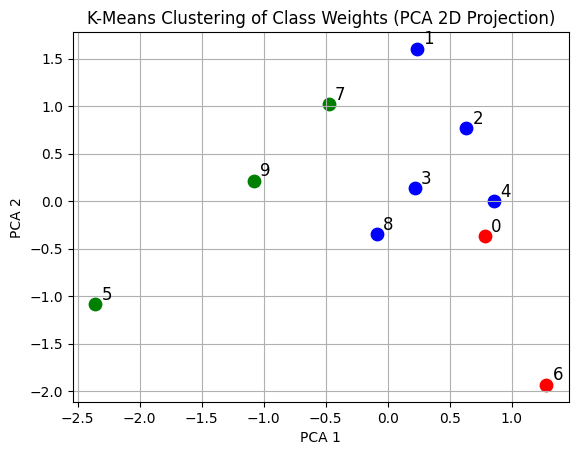

In [ ]:
# cluster the model

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# get the weights and bias from the model
weights, biases = model.layers[0].get_weights()
print("Weight matrix shape:", weights.shape)
print("Bias shape:", biases.shape)

W = weights.T

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=30)
labels = kmeans.fit_predict(W)

for class_type, cluster in enumerate(labels):
    print(f"Class {class_type} --> Cluster {cluster}")

pca = PCA(n_components=2)
W_pca = pca.fit_transform(W)

# show the cluster graphically
for i in range(W_pca.shape[0]):
    plt.scatter(W_pca[i, 0], W_pca[i, 1],
                c=colors[labels[i] % len(colors)], s=80)
    plt.text(W_pca[i, 0] + 0.05, W_pca[i, 1] + 0.05, str(i), fontsize=12)

plt.title("K-Means Clustering of Class Weights (PCA 2D Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

